In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_digits
from sklearn.metrics import confusion_matrix


In [3]:
digits = load_digits()
X = digits.data
y = digits.target

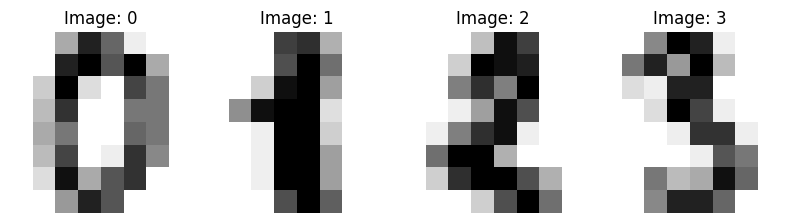

In [4]:
# Visualiser 4 images et leurs labels
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(8, 8))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title("Image: %i" % label)

plt.tight_layout()
plt.show()

In [6]:
# Diviser le dataset en jeu d'apprentissage et jeu de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [7]:
# Créer le modèle knn
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [8]:
# Le taux de précision
score = knn.score(X_test, y_test)
print("SCORE: %f" % score)

SCORE: 0.986667


In [10]:
# Tester k de 1 à 20
neighbors = np.arange(1, 21)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    train_accuracy[i] = knn.score(X_train, y_train)
    test_accuracy[i] = knn.score(X_test, y_test)

In [12]:
print("Taux de précision (test) pour k=1 à k=20: %s" % test_accuracy)

Taux de précision (test) pour k=1 à k=20: [0.98666667 0.98       0.98444444 0.98888889 0.98666667 0.98888889
 0.98888889 0.98888889 0.98888889 0.98888889 0.98888889 0.98888889
 0.98444444 0.98666667 0.98222222 0.98222222 0.98222222 0.98
 0.97555556 0.97777778]


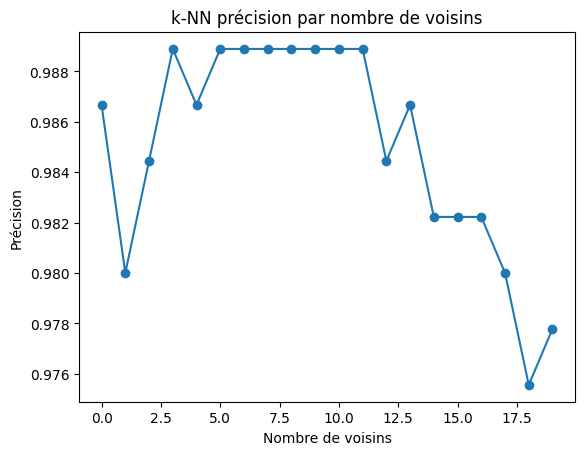

In [11]:
# Visualisation Taux de précision (test)
plt.plot(test_accuracy, 'o-')
plt.title('k-NN précision par nombre de voisins')
plt.xlabel('Nombre de voisins')
plt.ylabel('Précision')
plt.show()

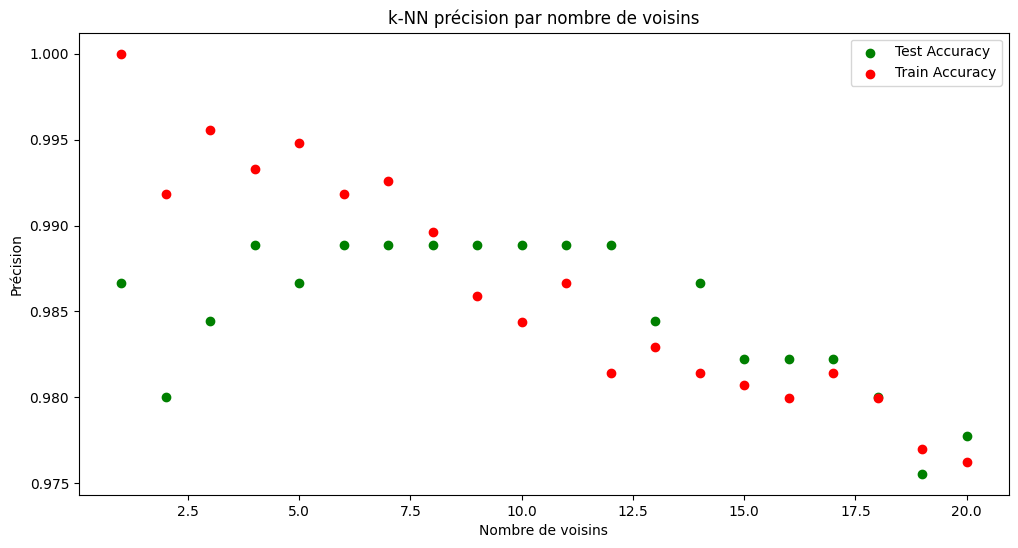

In [14]:
# Visualisation taux d'apprentissage et test
plt.figure(figsize=(12, 6))
plt.title('k-NN précision par nombre de voisins')
plt.scatter(neighbors, test_accuracy, label='Test Accuracy', color='green')
plt.scatter(neighbors, train_accuracy, label='Train Accuracy', color='red')
plt.legend()
plt.xlabel('Nombre de voisins')
plt.ylabel('Précision')
plt.show()

In [15]:
# Prédictions avec le modèle k-NN
y_pred = knn.predict(X_test)

In [19]:
# Matrice de confusion
cm = confusion_matrix(y_test, y_pred)
cm

array([[45,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 38,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 1,  0, 47,  0,  0,  0,  0,  1,  0,  0],
       [ 0,  0,  0, 48,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 46,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 28,  1,  0,  0,  0],
       [ 1,  0,  0,  0,  0,  0, 47,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 54,  0,  0],
       [ 0,  1,  1,  0,  0,  0,  0,  0, 46,  0],
       [ 0,  1,  0,  0,  0,  0,  0,  2,  1, 41]])